In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize
import random

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [141]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
df = pd.read_excel("lsat_train.xlsx")
df1 = df.iloc[:,0:4]

df = pd.read_excel("lsat_test.xlsx")
df2 = df.iloc[:,0:4]

In [51]:
df1.describe() # change isblack into categorical or rnage of gpa to 0-4

,gpa,lsat,isblack,fya
count,15653.000000,15653.000000,15653.000000,15653.000000
mean,3.236485,36.982400,0.064077,0.146413
std,0.412519,5.334661,0.244898,0.926228
min,0.000000,11.000000,0.000000,-3.350000
25%,3.000000,34.000000,0.000000,-0.490000
50%,3.300000,37.000000,0.000000,0.140000
75%,3.500000,41.000000,0.000000,0.790000
max,4.200000,48.000000,1.000000,3.480000


In [97]:

lsat_trainX = df1.values[:,0:3]
lsat_trainY = df1.values[:,3]

lsat_testX = df2.values[:,0:3]
lsat_testY = df2.values[:,3]

In [346]:
lsat_testX.shape

(3913, 3)

Inference from model description and plot:

Doubts:
1. can gpa be greater than 4? 

Plots and features's descriptions hints that model is not properly trained because
1. ratio of blacks to whites is ~ 1:14

So, given a model, if our explanation says to change the race, then debugger can sense something is wrong with model building.
sounds ok??


In [68]:
len(df1[df1['gpa']>4])

1003

In [347]:
print(len(df2[df1['isblack']==0]))
print(len(df2[df1['isblack']==1]))

3634
279


C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Training

In [100]:
# checked the model by scaling it - no improvement - so using unscaled versions for interpretability
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(lsat_trainX)
X_train = scaler.transform(lsat_trainX)
X_test = scaler.transform(lsat_testX)

In [144]:
# using manual test set
seed = 7
np.random.seed(seed)

# create model
model = Sequential()
model.add(Dense(20, input_dim=3, kernel_initializer='normal', bias_initializer='zeros', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', bias_initializer='zeros', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', bias_initializer='zeros'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Fit the model
model.fit(lsat_trainX, lsat_trainY, validation_data=(lsat_testX,lsat_testY), epochs=100)

Train on 15653 samples, validate on 3913 samples
Epoch 1/100
15653/15653 [==============================] - 1s 52us/step - loss: 0.8410 - mean_absolute_error: 0.7394 - val_loss: 0.8146 - val_mean_absolute_error: 0.7262
Epoch 2/100
15653/15653 [==============================] - 0s 24us/step - loss: 0.8070 - mean_absolute_error: 0.7251 - val_loss: 0.7707 - val_mean_absolute_error: 0.7075
Epoch 3/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7799 - mean_absolute_error: 0.7122 - val_loss: 0.7573 - val_mean_absolute_error: 0.7014
Epoch 4/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7697 - mean_absolute_error: 0.7077 - val_loss: 0.7590 - val_mean_absolute_error: 0.7017
Epoch 5/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7647 - mean_absolute_error: 0.7044 - val_loss: 0.7765 - val_mean_absolute_error: 0.7095
Epoch 6/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7644 - mean_absolut

Epoch 49/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7553 - mean_absolute_error: 0.6997 - val_loss: 0.7521 - val_mean_absolute_error: 0.6990
Epoch 50/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7575 - mean_absolute_error: 0.7009 - val_loss: 0.7526 - val_mean_absolute_error: 0.6994
Epoch 51/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7565 - mean_absolute_error: 0.6999 - val_loss: 0.7492 - val_mean_absolute_error: 0.6978
Epoch 52/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7552 - mean_absolute_error: 0.6996 - val_loss: 0.7539 - val_mean_absolute_error: 0.6998
Epoch 53/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7555 - mean_absolute_error: 0.6998 - val_loss: 0.7492 - val_mean_absolute_error: 0.6975
Epoch 54/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7548 - mean_absolute_error: 0.6994 - val_loss: 0.7484 - val_me

Epoch 97/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7537 - mean_absolute_error: 0.6990 - val_loss: 0.7467 - val_mean_absolute_error: 0.6972
Epoch 98/100
15653/15653 [==============================] - 0s 22us/step - loss: 0.7540 - mean_absolute_error: 0.6988 - val_loss: 0.7544 - val_mean_absolute_error: 0.7000
Epoch 99/100
15653/15653 [==============================] - 0s 23us/step - loss: 0.7544 - mean_absolute_error: 0.6993 - val_loss: 0.7480 - val_mean_absolute_error: 0.6974
Epoch 100/100
15653/15653 [==============================] - 0s 22us/step - loss: 0.7530 - mean_absolute_error: 0.6985 - val_loss: 0.7476 - val_mean_absolute_error: 0.6973


In [145]:
from sklearn.metrics import r2_score

ypreds = model.predict(lsat_testX)

r2_score(lsat_testY, ypreds.ravel())

0.11080368786061934

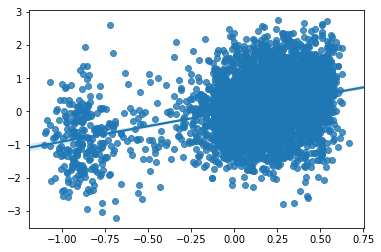

In [146]:
sns.regplot(ypreds.ravel(), lsat_testY)

### Generate CFs

In [391]:
from scipy.optimize import Bounds

In [427]:
bounds = Bounds([0, 11, 0], [4.2, 48, 1])

In [387]:
def mad(k):
#    if k == 2:
#        return 0.5
    med1 = np.median(lsat_trainX[:,k])
    return np.median(abs(lsat_trainX[:,k] - med1))

def dist_amad(x1, x2):
    d = 0
    for k in range(0,num_features):
        d = d+(abs(x1[k] - x2[k])/mad(k))
    return d

def dist_ued(x1, x2):
    return sum((x1 - x2)**2)

def dist_ned(x1, x2):
    d = 0
    for k in range(0,num_features):
        d = d+( ((x1[k] - x2[k])**2) / np.std(lsat_trainX[:,k]) )
    return d

# function to get input data point and target counterfactual class
def get_params():
    return [X_test[11], 0] # replace this with user-given inputs
    

def CF_fun(x, x1, y2, lam):
    #[x1, y2] = get_params()
    return (lam*(model.predict(np.array([x.tolist()]))[0] - y2)**2.0 + dist_ued(x1, x))


In [488]:
model.input[1]

<tf.Tensor 'strided_slice_14:0' shape=(3,) dtype=float32>

In [480]:
np.array([lsat_trainX[p[0]]])

array([[ 3.2, 44. ,  0. ]])

In [498]:
my_test_cases[2]

array([ 3.3, 28. ,  1. ])

In [518]:
tf.Session().run(gradients)

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_67_input' with dtype float and shape [?,3]
	 [[Node: dense_67_input = Placeholder[dtype=DT_FLOAT, shape=[?,3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_67_input', defined at:
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-144-bcd90072fea1>", line 7, in <module>
    model.add(Dense(20, input_dim=3, kernel_initializer='normal', bias_initializer='zeros', activation='relu'))
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\sequential.py", line 162, in add
    name=layer.name + '_input')
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\input_layer.py", line 176, in Input
    input_tensor=tensor)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\input_layer.py", line 85, in __init__
    name=self.name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 514, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_67_input' with dtype float and shape [?,3]
	 [[Node: dense_67_input = Placeholder[dtype=DT_FLOAT, shape=[?,3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
np.random.rand()

In [503]:
gradients = k.gradients(model.output, model.inputs)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(gradients))

InvalidArgumentError: You must feed a value for placeholder tensor 'dense_67_input' with dtype float and shape [?,3]
	 [[Node: dense_67_input = Placeholder[dtype=DT_FLOAT, shape=[?,3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'dense_67_input', defined at:
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 422, in run_forever
    self._run_once()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\asyncio\base_events.py", line 1432, in _run_once
    handle._run()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-144-bcd90072fea1>", line 7, in <module>
    model.add(Dense(20, input_dim=3, kernel_initializer='normal', bias_initializer='zeros', activation='relu'))
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\sequential.py", line 162, in add
    name=layer.name + '_input')
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\input_layer.py", line 176, in Input
    input_tensor=tensor)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\input_layer.py", line 85, in __init__
    name=self.name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py", line 514, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5835, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dense_67_input' with dtype float and shape [?,3]
	 [[Node: dense_67_input = Placeholder[dtype=DT_FLOAT, shape=[?,3], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [500]:
# trying to compute gradient of keras model
from keras import backend as k
gradients = k.gradients(model.output, model.inputs)

#sess = tf.InteractiveSession()
def loss(x):
    #return dist_ned(my_test_cases[2], x)
    #return 100*(model.predict(np.array([x.tolist()]))[0] - 0)**2.0 + dist_ned(my_test_cases[0], x)
    return 100*(model.predict(np.array([x.tolist()]))[0] - 0)**2.0 + dist_ned(my_test_cases[0], x)

'''
def jaco(x):
    sess.run(tf.initialize_all_variables())
    evaluated_gradients = sess.run(gradients,feed_dict={model.input:np.array([x.tolist()])}) #np.array([x])
    type(evaluated_gradients)
    return evaluated_gradients
'''

minimize(loss, np.array([0.8,15,1]), method='L-BFGS-B', bounds = bounds, options={'disp': True})#jac=jaco, 

      fun: array([124.89078], dtype=float32)
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([0., 0., 0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 0
   status: 0
  success: True
        x: array([ 0.8, 15. ,  1. ])

In [446]:
gradients

[<tf.Tensor 'gradients_10/dense_67/MatMul_grad/MatMul:0' shape=(?, 3) dtype=float32>]

In [459]:
res = []
num_features = len(lsat_trainX[1,:])
def generate_CFs(my_test_cases, my_CF_outcome):
    for case in my_test_cases: # can extend to diff outcomes for diff test cases
        x1 = case
        y2 = 0
        lam = 100 # need to parameterize this one
    
        p = random.sample(range(0, len(lsat_trainX)), 1)
        print(p)
        #res.append(minimize(CF_fun, lsat_trainX[p[0]], args=(x1, y2, lam), method='nelder-mead', 
        #                    options={'xtol': 1e-8, 'disp': True}, bounds = bounds))
        res.append(minimize(CF_fun, lsat_trainX[p[0]], args=(x1, y2, lam), method='L-BFGS-B', jac=jaco,
                             bounds = bounds, options={'disp': True}))
     

In [460]:
generate_CFs(my_test_cases, 0)

[12631]


TypeError: failed to initialize intent(inout|inplace|cache) array, input not an array

In [432]:
for r in res:
    print(np.round(r.x, 2))

[ 3.05 38.99  0.25]
[ 3.54 47.95  0.83]
[3.600e+00 2.803e+01 2.000e-02]
[ 2.77 28.54 -0.22]
[ 2.84 18.3  -0.47]


In [342]:
# testiung if something happened? match with random initialization
lsat_trainX[1663,:]

array([ 2.8, 37. ,  0. ])

In [184]:
my_test_cases

array([[ 3.1, 39. ,  0. ],
       [ 3.7, 48. ,  0. ],
       [ 3.3, 28. ,  1. ],
       [ 2.4, 28.5,  1. ],
       [ 2.7, 18.3,  0. ]])

In [395]:
my_test_cases = np.array([[3.1, 39.0, 0], [3.7, 48.0, 0], [3.3, 28.0, 1], [2.4, 28.5, 1], [2.7, 18.3, 0]]) 
model.predict(my_test_cases)

array([[ 0.17889327],
       [ 0.56611145],
       [-0.87879485],
       [-0.92276317],
       [-0.6067992 ]], dtype=float32)

In [344]:
model.predict(np.array([[2.8, 28.1, -0.4]]))

array([[0.1985851]], dtype=float32)

In [386]:
# df2[(df2['gpa']==3.7) & (df2['lsat']==48.0) & (df2['isblack']==0) & (df2['fya']==0.54)] # this is not in test set
#df1[(df1['gpa']==3.1) & (df1['lsat']==39.0) & (df1['isblack']==0) & (df1['fya']==0.17)] # this is not in train set
# so inference is original data is that data that are predicted by the algo.

,gpa,lsat,isblack,fya


#### using keras optimizer

#### Adam from tensorflow

In [275]:
import tensorflow as tf

In [519]:
x1 = my_test_cases[0]
y2 = 0
lam = 5 # need to parameterize this one

def mypred(x3):
    #return 100*(model.predict(np.array(x3)) - 0)**2.0
    return 100*(model.predict(np.array(x3.tolist()))[0] - 0)**2.0
#    return (lam*(model.predict(np.array([x.tolist()]))[0] - y2)**2.0 + dist_amad(x1, x))

fx2 = mypred(x2) + dist_amad(my_test_cases[0], x2)

#fx2 = dist_amad(my_test_cases[0], x2)

optimizer = tf.train.AdamOptimizer(learning_rate=.001).minimize(fx2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        print(sess.run([x2,fx2]))
        sess.run(optimizer)

AttributeError: 'Variable' object has no attribute 'tolist'

In [ ]:
p = random.sample(range(0, len(lsat_trainX)), 1)

def foo():
  with tf.variable_scope("foo", reuse=tf.AUTO_REUSE):
    x = tf.get_variable('x', initializer = lsat_trainX[p[0]])
  return x

x = foo()
#x2 = tf.get_variable('x2', initializer = lsat_trainX[p[0]]) #, dtype=np.ndarray, shape=[1,3]

#### method 2

In [378]:

x1 = my_test_cases[0]
y2 = 0
lam = 5 # need to parameterize this one

def mypred(x4):
    print(x4)
    x5 = x4
    pred = 100*(model.predict(x5) - 0)**2.0
    return pred
    
fx2 = mypred(np.array([[v1,v2,v3]])) + dist_amad(my_test_cases[0], x2)

#fx2 = dist_amad(my_test_cases[0], x2)

optimizer = tf.train.AdamOptimizer(learning_rate=.001).minimize(fx2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(50):
        print(sess.run([x2,fx2]))
        sess.run(optimizer)

[[<tf.Variable 'v1:0' shape=() dtype=float64_ref>
  <tf.Variable 'v2:0' shape=() dtype=float64_ref>
  <tf.Variable 'v3:0' shape=() dtype=float64_ref>]]


ValueError: setting an array element with a sequence.

In [374]:
#x3 = tf.get_variable('x3', initializer = lsat_trainX[p[0]], trainable=True)
v1 = tf.get_variable('v1', initializer = lsat_trainX[p[0]][0], trainable=True)
v2 = tf.get_variable('v2', initializer = lsat_trainX[p[0]][1], trainable=True)
v3 = tf.get_variable('v3', initializer = lsat_trainX[p[0]][2], trainable=True)

In [373]:
a=3.2
b=40.2
c=1
d=np.array([[a,b,c]])
print(d)
model.predict(d)

[[ 3.2 40.2  1. ]]


array([[-0.47675115]], dtype=float32)

In [371]:
d=lsat_trainX[p[0]]
print(d)
print(np.array([d.tolist()]))

[ 3.2 44.   0. ]
[[ 3.2 44.   0. ]]


In [290]:
x

<tf.Variable 'foo/x:0' shape=(3,) dtype=float64_ref>

#### method 3: - use tensorflow model and train. 

But before that, see if tensorflow variables accepts such variables and then proceed. That is, see normal tensorflwo optimization problem with theri model and see any difference. that their model accepts tensorflow variable istead of scalar - see previous prob

### Rough


Several approaches now:
1. try adam from tensorflwo within 4.30 - cap values and 
2. it has limitations - quora https://www.quora.com/Can-one-optimise-arbitrary-functions-using-tensorflow, so use general Opt
    a. how MAD is used for race or can be used for other discrete var- becomes it becomes 0
3. try cvopt 


1. other improvements in MSR docs - bound constraints, separate dist func for each feature, etc
2. think about determinats approach
3. git the notebooks


In [253]:
med1 = np.median(lsat_testX[:,2])
print(med1)
print(abs(lsat_testX[:,2] - med1))

0.0
[0. 0. 0. ... 0. 0. 0.]


In [255]:
s1 = my_test_cases[0]
s2 = my_test_cases[1]

In [257]:
dist_ned(s1, s2)

16.056919639724665

In [258]:
100*(model.predict(np.array([s2.tolist()]))[0] - 0)**2.0 + dist_amad(s1, s2)

array([nan], dtype=float32)

In [208]:
sum((my_test_cases[0] - my_test_cases[1])**2)

81.36

In [30]:
list(df1)

['gpa', 'lsat', 'isblack', 'fya']

In [398]:
model.predict(np.array([[ 3.1, 39., 0. ]]))

array([[0.17889327]], dtype=float32)

In [399]:
np.array([[ 3.1, 39., 0. ]]).flatten()

array([ 3.1, 39. ,  0. ])

In [402]:
a = np.array([[ 3.1, 39., 0. ]])
a[0][1]

39.0

In [404]:
x = tf.Variable(3.0, trainable=True)
y = tf.Variable(4.0, trainable=True)
f = tf.add_n([tf.square(tf.add(tf.subtract(1.5, x), tf.multiply(x, y))),
          tf.square(tf.add(tf.subtract(2.25, x), tf.multiply(x, tf.square(y)))),
          tf.square(tf.add(tf.subtract(2.625, x), tf.multiply(x, tf.pow(y, 3))))])

opt = tf.train.GradientDescentOptimizer(0.01)
grads_and_vars = opt.compute_gradients(f, [x, y])
clipped_grads_and_vars = [(tf.clip_by_value(g, -4.5, 4.5), v) for g, v in grads_and_vars]

train = opt.apply_gradients(clipped_grads_and_vars)


In [405]:
grads_and_vars

[(<tf.Tensor 'gradients_3/AddN:0' shape=() dtype=float32>,
  <tf.Variable 'Variable_2:0' shape=() dtype=float32_ref>),
 (<tf.Tensor 'gradients_3/AddN_1:0' shape=() dtype=float32>,
  <tf.Variable 'Variable_3:0' shape=() dtype=float32_ref>)]

### Plots

teeess


C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'norm

asdf


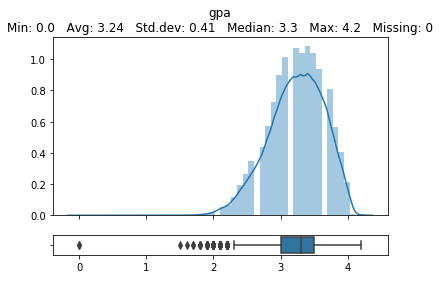

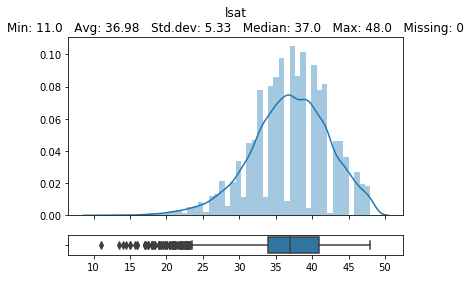

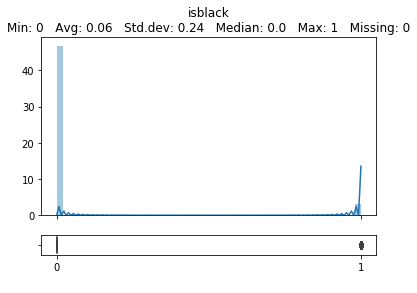

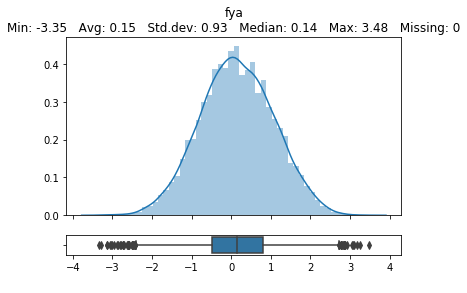

In [60]:
plot_features_of(df1, list(df1))

teeess


C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\t-rakomm\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'norm

asdf


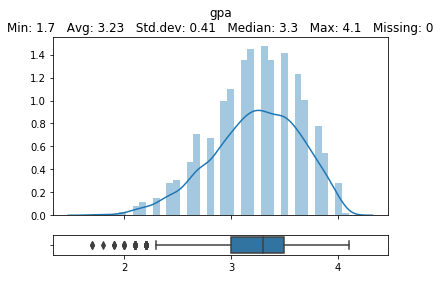

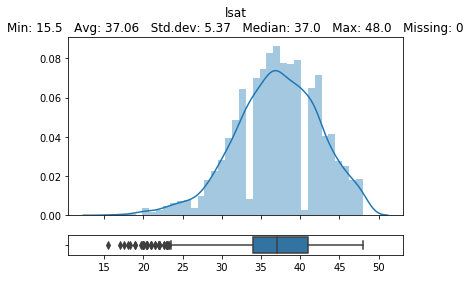

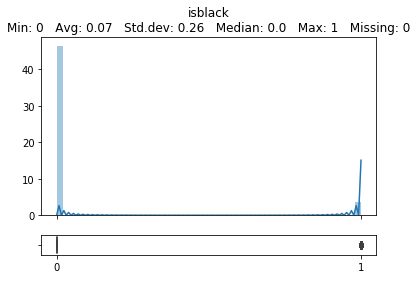

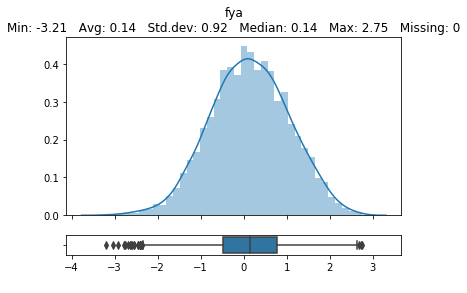

In [61]:
plot_features_of(df2, list(df2))

In [550]:
a = tf.constant(np.array([[1, 23, 3]]))
b = tf.constant(np.array([[1, 1, 0]]))

with tf.Session() as sess:
    print(sess.run(tf.add(a,b)))

[[ 2 24  3]]
